In [54]:
import pandas as pd
import numpy as np
import random


In [80]:
restos_df = pd.read_csv("zomato_restos_new.csv")
restos_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resto_id  816 non-null    int64 
 1   name      816 non-null    object
 2   dishes    816 non-null    object
dtypes: int64(1), object(2)
memory usage: 19.2+ KB


In [81]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"Chicken Dum Biryani [1 Kg],Chicken Pulav [1 Kg..."
1,1,Vrindavan,"Veg Grilled Sandwich,Grilled Cheese Sandwich,V..."
2,2,Cakes & Candies,"Black Forest Cream Cake [2 kg],Belgium Chocol..."
3,3,Boojee Cafe,"Truffled Avocado Toast,Truffled Scramble Eggs,..."
4,4,Cake Walkers,"Belgium Chocolate Cake [1 kg],Death by Chocola..."


In [82]:
restos_df.shape

(816, 3)

## Normalizing the dishes

In [83]:
restos_df["dishes"] = restos_df["dishes"].str.lower()

In [84]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"chicken dum biryani [1 kg],chicken pulav [1 kg..."
1,1,Vrindavan,"veg grilled sandwich,grilled cheese sandwich,v..."
2,2,Cakes & Candies,"black forest cream cake [2 kg],belgium chocol..."
3,3,Boojee Cafe,"truffled avocado toast,truffled scramble eggs,..."
4,4,Cake Walkers,"belgium chocolate cake [1 kg],death by chocola..."


In [85]:
import nltk

In [86]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
restos_df["dishes"] = restos_df["dishes"].map(lambda x: nltk.word_tokenize(x))

In [88]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"[chicken, dum, biryani, [, 1, kg, ], ,, chicke..."
1,1,Vrindavan,"[veg, grilled, sandwich, ,, grilled, cheese, s..."
2,2,Cakes & Candies,"[black, forest, cream, cake, [, 2, kg, ], ,, b..."
3,3,Boojee Cafe,"[truffled, avocado, toast, ,, truffled, scramb..."
4,4,Cake Walkers,"[belgium, chocolate, cake, [, 1, kg, ], ,, dea..."


In [89]:
porter = nltk.PorterStemmer()

In [90]:
lancaster = nltk.LancasterStemmer()

In [91]:
wnl = nltk.WordNetLemmatizer()

In [92]:
restos_df["dishes"] = restos_df["dishes"].map(lambda x: [porter.stem(t) for t in x])

In [93]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"[chicken, dum, biryani, [, 1, kg, ], ,, chicke..."
1,1,Vrindavan,"[veg, grill, sandwich, ,, grill, chees, sandwi..."
2,2,Cakes & Candies,"[black, forest, cream, cake, [, 2, kg, ], ,, b..."
3,3,Boojee Cafe,"[truffl, avocado, toast, ,, truffl, scrambl, e..."
4,4,Cake Walkers,"[belgium, chocol, cake, [, 1, kg, ], ,, death,..."


In [95]:
restos_df["dishes"] = restos_df["dishes"].map(lambda x: ' '.join(map(str, x)))

In [96]:
restos_df.head()

,resto_id,name,dishes
0,0,Sangeeta's Kitchen,"chicken dum biryani [ 1 kg ] , chicken pulav [..."
1,1,Vrindavan,"veg grill sandwich , grill chees sandwich , ve..."
2,2,Cakes & Candies,"black forest cream cake [ 2 kg ] , belgium cho..."
3,3,Boojee Cafe,"truffl avocado toast , truffl scrambl egg , av..."
4,4,Cake Walkers,"belgium chocol cake [ 1 kg ] , death by chocol..."


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

In [98]:
tf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tf.fit_transform(restos_df['dishes'])

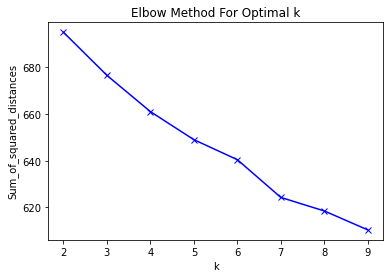

In [99]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(tfidf_matrix)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [103]:
true_k = 7
title = restos_df["name"]
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(tfidf_matrix)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                            title  cluster
170       Zam Zam Sweets & Bakery        0
57       Anupam Sweets And Farsan        0
56                        Heerson        0
335                       Creamyz        0
334  Gayatri Dairy Sweet & Farsan        0
..                            ...      ...
682                          Olea        6
527                      Yauatcha        6
684               Shawarma Corner        6
673                   Boss Burger        6
422            Carter's Quickeats        6

[816 rows x 2 columns]


Cluster: 0
Titles
                               Cakes & Candies
                                  Cake Walkers
                                     Theobroma
               KCROASTERS - A Koinonia Project
                        Trupti Farsan & Sweets
 Purshottam Kandoi Haribhai Damodar Mithaiwala
                                       Heerson
                      Anupam Sweets And Farsan
                                       Birdy's
                         Annapurna Farsan Mart
                        Cake Bakebon Live Cake
                                 Tosita Bakery
                                   Sweet Truth
                              The Bakers Table
                    Bangalore Iyangar's Bakery
                                      Monginis
                       World Of Cakes & Snacks
                                  Tasty Corner
                                  Live Baker's
                                  Cake Factory
                       Zam Zam Sweets & Ba

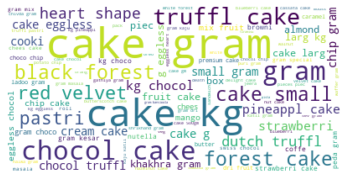

Cluster: 1
Titles
                      Sangeeta's Kitchen
                        Cafe Irani Chaii
                         Canteen Central
                         Biryani By Kilo
                         Chaudhary Tadka
                             Eat Healthy
                          Famous Biryani
                        The Biryani Life
                        Jaspal Di Bhatti
                             Shree Foods
                                  Kozzby
                            W Food Court
                          Flying Turbaan
                       Thalis And Combos
                          Beeji Ki Rasoi
                             Hurry Curry
                          Tibb's Frankie
                            Burgundy Box
                   Bhagirathi Restaurant
                            Kilo Culture
                       Madhva Restaurant
                          Delhi Da Dhaba
                       Natwar Restaurant
                     Hearty Roll Compan

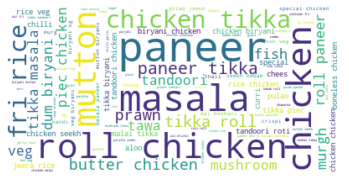

Cluster: 2
Titles
                        Home Deli
                     Hotel Mahesh
                        Moms Cafe
                Bhot Hard Chinese
                Hong Kong Chinese
                       99 Chinese
                    A One Chinese
                  National Bakery
                The Great Chinese
                  Express Chinese
              Your Choice Chinese
                      Hub Chinese
           A To Z Sweets & Snacks
              New R.M. Restaurant
               Dark Night Kitchen
                       Food Point
                         Chi-Nice
          Three Star Food Express
                        China Man
                           Machao
                       Cafe Sahil
      Spoonwise- The Organic Cafe
                  The Food House 
               Diamond Restaurant
                        Mumbai 54
                Homemade Junction
            Al Barkat Food Corner
                    Molten Cheese
                    Bey's Kitc

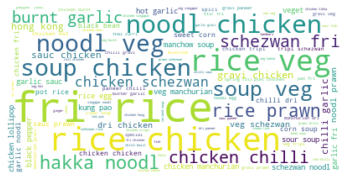

Cluster: 3
Titles
                Blue Tokai Coffee Roasters
                         The Baker's Dozen
                                Oye Kiddan
             Poetry by Love and Cheesecake
                  Chaayos - Meri Wali Chai
                            The Nutcracker
                              Sweet Bengal
                            The Yoga House
                      Shree Krishna Chhaya
                         Udipi Refreshment
                                   Pishu's
                               Apple A Day
                          Lucky Restaurant
                   Earth Cafe @ Waterfield
                   Tewari Bros. Mithaiwala
                                       Vig
                    The Belgian Waffle Co.
                           Chai Pe Charcha
                        Coffee By Di Bella
           Thepla House by Tejal's kitchen
                      Ekadashi Upahargruha
                      Great Indian Khichdi
                            Baskin R

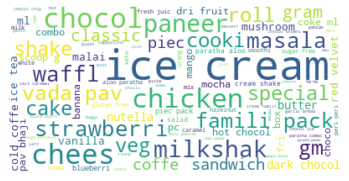

Cluster: 4
Titles
                   Vrindavan
    Spukies - The Veg Sigree
              Madras Diaries
                 Arya Bhavan
       Amrut Sagar Fast Food
            N P Iyer Kitchen
                        Elco
                 Anand Stall
            Manohar Pure Veg
             Hotel Sudarshan
                 Banana Leaf
      Sridevi Veg Restaurant
            Southern Delight
 Shubham Pure Veg Restaurant
       Satkar Veg Restaurant
         Anna's Tasty Corner
           Tasty Treat India
             N P Iyer Bhavan
              Mani Delicious
     Shedge Fast Food Corner
                 Super South
                Rama Krishna
                 Shubh Sagar
    Mumbai Ki Masti Vada Pav
                     Modakam
             Nashta And More
                     Thambbi
             Anna Dosa Point
         Sainath Dosa Center
            Sujata Veg Treat
                     Shabari
                   Sai Sagar
                Amazing Dosa
  Shree Krishna Refreshme

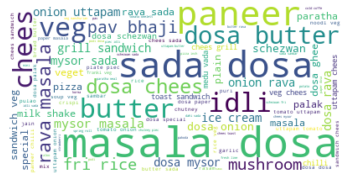

Cluster: 5
Titles
                          Boojee Cafe
                       The Bagel Shop
                              Fuel Up
                  Bombay Coffee House
                           Shiv Sagar
                        Radha Krishna
                           Sandwizzaa
                       Kumar Sandwich
                      Kurla Juicy Hut
         A.B.C.D - Any Body Can Drool
              Sadguru Sandwich Centre
               Curry And Combos Twist
                       Gupta Sandwich
                          Balaji Cafe
                       Om Sai Frankie
                            A1 Franky
               The Sandwich Mania Co.
                 Fine Touch Fast Food
                         Tangy Gossip
                         DN Food Zone
                   Kirti Mahal Snacks
                       Pranavs Corner
                       Chai Sutta Bar
                     Gupta's SnackHub
                      Fast Food Villa
 Sai Krupa Sandwich And Snacks C

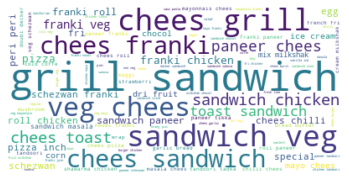

Cluster: 6
Titles
                     Nothing But Chicken
                              McDonald's
             Birdsong - The Organic Cafe
                               Mac Craig
                             Burger King
                                  Subway
                         Happie Calories
                    Aromas Cafe & Bistro
                               FreshMenu
                                  Faasos
                         Firangi Burgers
                 Aqua - Sun N Sand Hotel
                        Deli By The Blue
                           Bae's Kitchen
                          Easyhuman Cafe
                          La Cane Bistro
                             Khar Social
                            Hotel Lijesh
               Jumboking - Indian Burger
                                  Pomona
                              Fire Wings
                        Maxim Restaurant
                        Maushi's Kitchen
                            Boss Chines

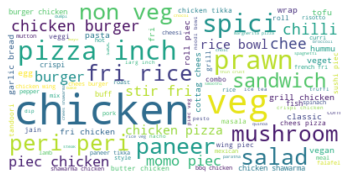

In [104]:
from wordcloud import WordCloud
result={'cluster':labels,'dishes':restos_df["dishes"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['dishes'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [105]:
tfidf_matrix.shape

(816, 7711)

In [106]:
X_dbscan = tfidf_matrix.todense()

In [107]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,min_samples=10).fit(X_dbscan)

In [108]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_ 

In [109]:
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

In [110]:
import matplotlib.pyplot as plt 

['y', 'b', 'g', 'r']


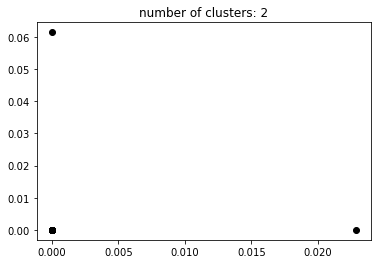

In [111]:
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X_dbscan[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X_dbscan[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

In [114]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) 
results = {}
for idx, row in restos_df.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(cosine_similarities[idx][i], restos_df['resto_id'][i]) for i in similar_indices] 
   results[row['resto_id']] = similar_items[1:]

In [115]:
def item(id):  
  return restos_df.loc[restos_df['resto_id'] == id]['resto_id'].tolist()[0]


In [116]:
def recommend(item_id, num):
    print("Recommending " + str(num) + " restaurants similar to " + str(item(item_id)) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + str(item(rec[1])) + " (score:" + str(rec[0]) + ")")

In [117]:
recommend(item_id=61, num=5)

Recommending 5 restaurants similar to 61...
-------
Recommended: 150 (score:0.5285379920701276)
Recommended: 775 (score:0.525062827520854)
Recommended: 126 (score:0.4447935424066903)
Recommended: 735 (score:0.4391917052466062)
Recommended: 784 (score:0.4150373891456761)


In [119]:
restos_df.loc[restos_df['resto_id']==61]

,resto_id,name,dishes
61,61,Faasos,"mutton awadhi biryani ( serv 1 ) , mutton over..."


In [120]:
restos_df.loc[restos_df['resto_id']==150]

,resto_id,name,dishes
150,150,Meals Express,"boneless mutton curri meal ( 3 pc ) , fish cur..."
